In [1]:
import os
os.chdir('..')

In [2]:
from eva5_final.config import Config
from eva5_final.dataset import ComboDataset
import matplotlib.pyplot as plt

In [3]:
d = ComboDataset(Config)
stuff = next(iter(d))

Caching labels data/yolo/labels.npy (3161 found, 0 missing, 42 empty, 0 duplicate, for 3203 images): 100%|██████████| 3203/3203 [00:00<00:00, 12738.44it/s]


In [4]:
stuff[0].shape

(64, 64, 3)

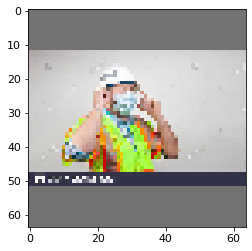

In [5]:
plt.imshow(stuff[0])

In [12]:
print(type(stuff[2]))
len(stuff[2])

<class 'tuple'>


4

In [2]:
from eva5_final.dataset import PlaneRCNNDataset
from eva5_final.config import PlaneRCNNConfig
import torch

In [3]:
dataset = PlaneRCNNDataset(PlaneRCNNConfig(), "data/planercnn/custom.data")
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 16,
    num_workers = 4,
    shuffle = True,
    pin_memory = True,
    collate_fn = dataset.collate_fn
)

In [4]:
stuff = next(iter(loader))

In [5]:
len(stuff)

16

In [6]:
for i in range(12):
    print(type(stuff[0][i]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [7]:
for i in range(12):
    print(stuff[0][i].shape)

torch.Size([1, 3, 640, 640])
torch.Size([1, 16])
torch.Size([1, 102300, 1])
torch.Size([1, 256, 4])
torch.Size([1, 13])
torch.Size([1, 13, 4])
torch.Size([1, 13, 56, 56])
torch.Size([1, 13, 3])
torch.Size([1, 640, 640])
torch.Size([1, 4, 4])
torch.Size([1, 640, 640])
torch.Size([6])
